<div style="background-color: RGB(0, 124, 176);" >
<h2 style="margin: auto; padding: 20px; color:#fff;text-align: center ">PROJET 12  - DETECTER DES FAUX BILLETS - ANALYSE 
</h2>
</div>

Dans ce notebook, nous allons procéder à la préparation  et à une analyse exploratoire des données sur les billets afin de mettre en place une application de machine learning pour détecter des faux billets monétaires.

Nous allons suivre les étapes suivantes:

[Etape 1. Importation des librairies et chargement des fichiers](#Etape-1.-Importation-des-librairies-et-chargement-des-fichiers)

[Etape 2. Préparation des données](#Etape-2.-Préparation-des-données)

[Etape 3. Analyse exploratoire des données](#Etape-3.-Analyse-exploratoire-des-données)

[Etape 4. Création du fichier final pour la mise en place des algorithmes](#Etape-4.-Création-du-fichier-final-pour-la-mise-en-place-des-algorithmes)

<div style="background-color: RGB(0, 124, 176);" >
<h2 style="margin: auto; padding: 20px; color:#fff;text-align: center ">Etape 1. Importation des librairies et chargement de fichier</h2>
</div>

### 1.1 Importation des librairies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1.2 Chargement du fichier des dimensions des billets de banque

In [39]:
df = pd.read_csv("billets.csv",sep=";")

<div style="background-color: RGB(0, 124, 176);" >
<h2 style="margin: auto; padding: 20px; color:#fff;text-align: center ">Etape 2. Préparation des données</h2>
</div>

### 2.1 Exploration du fichier

In [40]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [42]:
df.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


In [43]:
#Vérifier dans chaque colonne si il y a des valeurs incohérentes
for i in df.columns:
    print(df[i].unique())

[ True False]
[171.81 171.46 172.69 171.36 171.73 172.17 172.34 171.88 172.47 171.83
 171.84 171.89 172.2  172.06 171.3  171.9  171.87 171.82 172.1  172.56
 172.22 172.09 172.02 171.58 171.71 171.98 171.99 171.85 172.29 172.01
 171.8  172.   172.28 172.44 172.08 172.4  171.79 171.42 171.47 172.13
 172.07 171.95 172.03 171.64 171.56 171.25 171.66 172.24 172.41 172.33
 171.6  171.94 171.35 172.49 172.26 171.65 172.52 171.7  171.93 172.05
 171.57 171.86 171.54 171.53 171.55 171.96 172.27 171.91 172.23 172.11
 171.92 171.62 171.5  171.27 172.43 172.46 171.52 172.18 172.04 172.38
 172.35 171.72 171.97 171.75 172.15 172.31 172.21 171.28 172.58 172.37
 172.74 171.78 171.45 172.16 172.3  171.59 172.12 171.74 172.19 171.26
 171.29 171.69 172.5  172.32 172.76 171.34 171.77 172.45 171.67 171.68
 171.48 172.25 171.51 172.53 171.61 171.43 171.49 172.42 171.63 172.73
 171.19 172.14 172.51 172.54 172.36 171.41 172.6  172.55 171.76 171.4
 171.24 171.44 172.75 171.13 172.57 172.59 172.48 171.04 172.67 

### 2.2 Régression linéaire : Gestion des valeurs manquantes

In [44]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Il y a 37 valeurs manquantes dans la colonne margin_up

Il n'y a aucune valeurs aberrantes dans les colonnes.

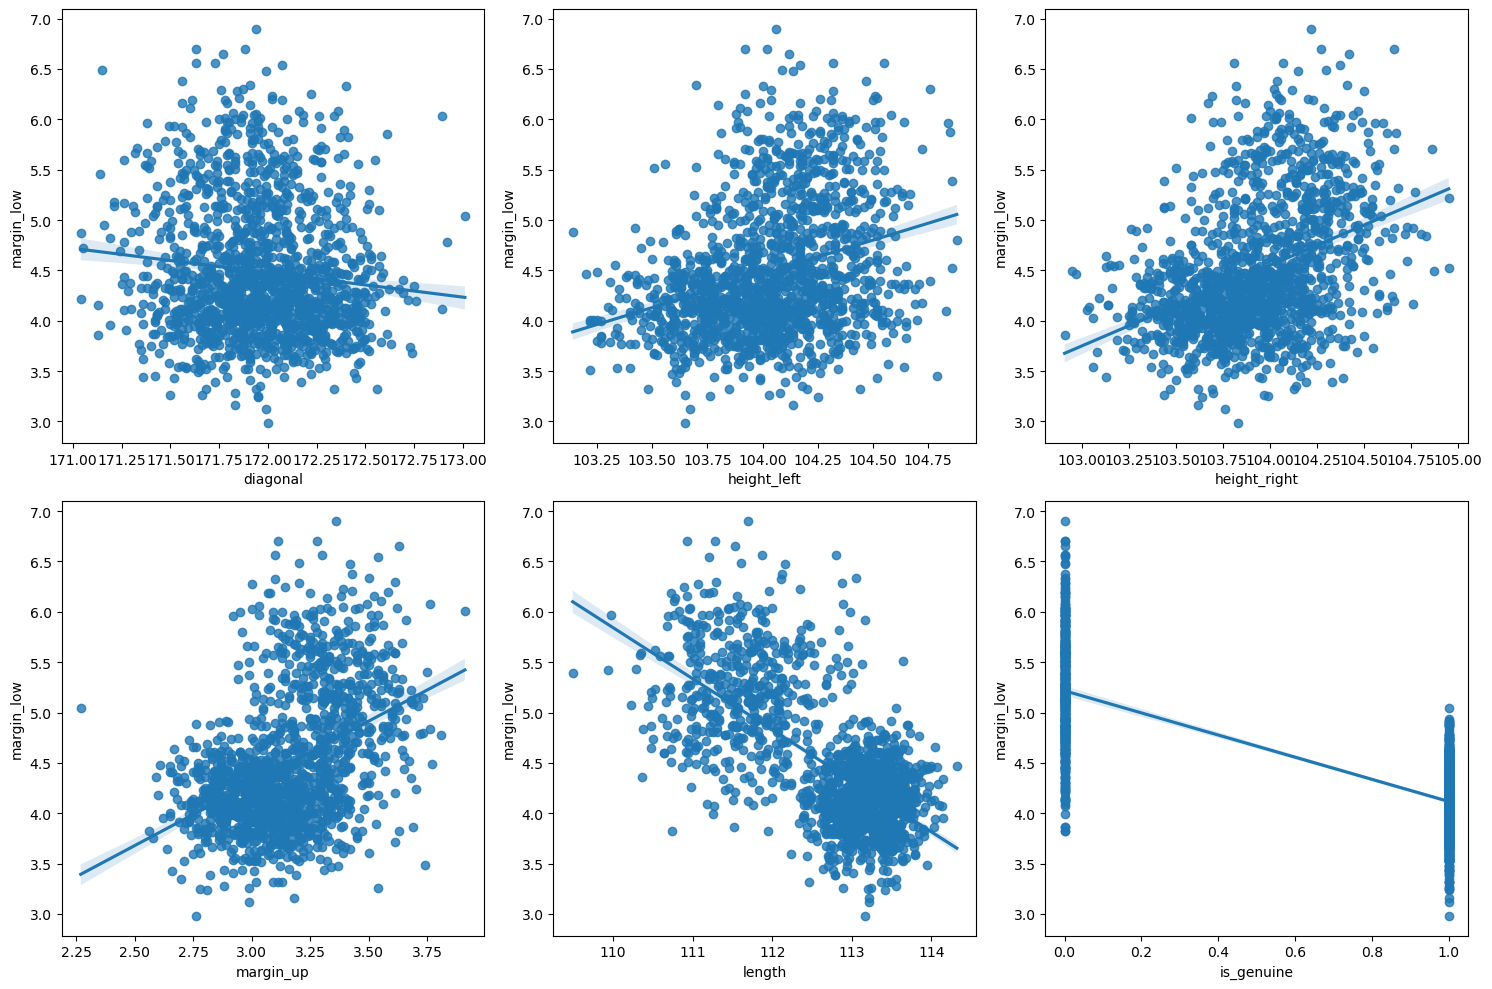

In [45]:
#Visualisation des régressions linéaires de chaque valeurs prédictives (x) par rapport à la valeur cible à prédire (y)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.regplot(x="diagonal", y="margin_low", data=df, ax=axes[0, 0])
sns.regplot(x="height_left", y="margin_low", data=df, ax=axes[0, 1])
sns.regplot(x="height_right", y="margin_low", data=df, ax=axes[0, 2])
sns.regplot(x="margin_up", y="margin_low", data=df, ax=axes[1, 0])
sns.regplot(x="length", y="margin_low", data=df, ax=axes[1, 1])
sns.regplot(x="is_genuine", y="margin_low", data=df, ax=axes[1, 2])

plt.tight_layout()
plt.show()

Visuellement, les régressions linéaires entre la valeur cible (margin_low) et les valeurs prédictives semblent fiables car la zone bleu (qui reflète l'incertitude du modèle) autour de la ligne est réduite.

In [46]:
#Régression linéaire pour imputer des valeurs pour remplacer les "NAN" de la colonne des margin_low

#Je crée le modèle de régression linéaire
reg = LinearRegression()


#Je crée un dataset sans valeurs manquantes
df_non_null = df[df["margin_low"].notna()]

#Je scinde le dataset en une partie valeurs prédictives (X) et une partie valeur cible (y)
X= df_non_null[["diagonal", "height_left", "height_right", "margin_up", "length","is_genuine"]]
y= df_non_null["margin_low"]

#Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Séparation des données pour entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

#J'entraîne le modèle
reg.fit(X_train,y_train)

# Prédiction sur test pour évaluation
y_pred_test = reg.predict(X_test)

#Calcul du score pour évaluer l'écart entre les vraies valeurs de test (y_test) et celles prédites par le modèle (y_pred_test)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE: 0.1373945287178082
MAPE: 0.0649607417221153


Score 0 (bon) et Score 1 (mauvais)
Ici, le score des métriques RMSE et MAPE est fiable car le % d'erreur entre la valeur du test et la valeur prédite est plus proche de 0.

In [47]:
# Prédire les valeurs manquantes (Sous-ensemble avec NaN dans margin_low)

df_missing = df[df["margin_low"].isna()]
X_missing = df_missing[["diagonal", "height_left", "height_right", "margin_up", "length","is_genuine"]] #Colonnes prédictives

# Prédiction pour imputation
y_pred_missing = reg.predict(X_missing)

# Remplacer les NaN par les prédictions
df.loc[df["margin_low"].isna(), "margin_low"] = y_pred_missing


In [48]:
#Vérifier si l'imputation des valeurs manquantes a bien été faite
df.margin_low.isnull().sum()

np.int64(0)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Il n'y a plus aucune données manquantes sur le dataset

### 2.3 Validité des valeurs créées par la régression linéaire

#### 2.3.1 Colinéarité

Deux variables explicatives ne doivent pas être trop corrélées entre elles, sinon elles apportent la même information au modèle. (Cela fausse les coefficients).

Si le VIF > 10 → colinéarité trop forte.

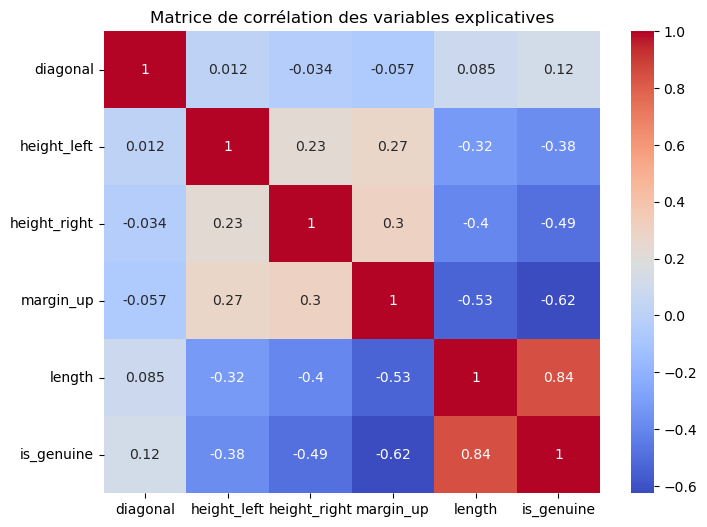

In [50]:
# Matrice de corrélation
corr = X_train.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables explicatives")
plt.show()


La matrice de corrélation montre qu’il n’y a pas de multicolinéarité forte entre la plupart des variables, sauf pour la variable length, qui est fortement corrélée avec la variable cible is_genuine. Cela signifie que la longueur du billet est un facteur discriminant important pour déterminer s’il est authentique ou non.

#### 2.3.2 Variance Inflation Factor (VIF)

Le VIF mesure la redondance entre les variables explicatives.

* VIF < 5 → pas de colinéarité

* 5 ≤ VIF < 10 → colinéarité modérée

* VIF ≥ 10 → forte colinéarité (problématique)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Nettoyage du jeu de données
X_vif = X_train.select_dtypes(include=[np.number]).dropna()

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
print(vif_data)

       Variable            VIF
0      diagonal  168489.805290
1   height_left  112050.451067
2  height_right   97264.947723
3     margin_up     260.285642
4        length   22753.618009


Les valeurs de VIF sont extrêmement élevées, ce qui indique une forte multicolinéarité entre certaines variables explicatives.
Cela signifie que certaines variables apportent des informations très similaires, rendant la régression instable et les coefficients peu fiables.
Il serait pertinent de supprimer ou combiner certaines variables fortement corrélées (comme length, height_left, height_right) pour améliorer la qualité du modèle.

#### 2.3.3 Homoscédasticité (Homogénéité des variances)

Les résidus (erreurs du modèle) doivent avoir une variance constante, quelle que soit la valeur prédite.
Les erreurs doivent être uniformément réparties autour de zéro.

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_sm = sm.add_constant(X_scaled)  # ajout de la constante
model_sm = sm.OLS(y, X_sm).fit()

residuals = model_sm.resid
exog = model_sm.model.exog

bp_test = het_breuschpagan(residuals, exog)
labels = ['LM Stat', 'LM-Test p-value', 'F-Stat', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Stat': np.float64(165.81873103787765), 'LM-Test p-value': np.float64(3.4639579716005116e-33), 'F-Stat': np.float64(31.02008924631896), 'F-Test p-value': np.float64(3.2339734220946904e-35)}


Les p-values sont faibles (en dessous de 0.05).
Cela signifie que l’hypothèse nulle d’homoscédasticité est rejetée : Les résidus ne sont pas homogènes, il y a donc de l’hétéroscédasticité.
Les intervalles de confiance et les tests de significativité peuvent être moins fiables.
La variance des erreurs du modèle n’est pas constante selon les valeurs des variables explicatives.

#### 2.3.4 Normalité des résidus (erreur du modèle)

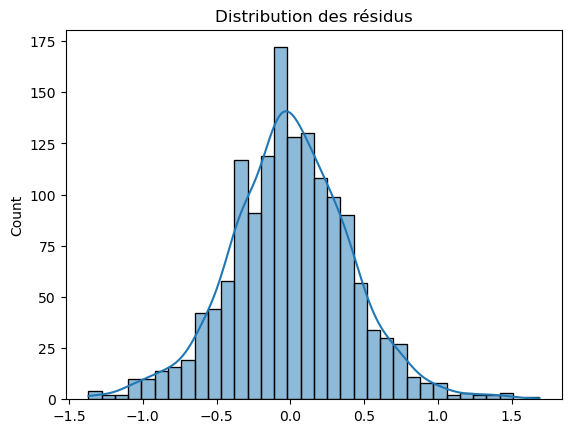

Statistique du test de Shapiro : 0.9936957822741033
p-value : 7.0606816506491425e-06
Les résidus ne sont pas normaux


In [53]:
import seaborn as sns
import scipy.stats as stats

sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.show()

# Test statistique de normalité
stat, p = stats.shapiro(residuals)
print("Statistique du test de Shapiro :", stat)
print("p-value :", p)
if p > 0.05:
    print("Les résidus suivent une loi normale")
else:
    print("Les résidus ne sont pas normaux")

* Si p-value > 0.05 → on ne rejette pas l’hypothèse de normalité.

* Si p-value < 0.05 → les résidus ne suivent pas une loi normale.

#### 2.35 R²

Le R² mesure la part de la variation des valeurs réelles que ton modèle parvient à expliquer.
Est-ce que le modèle comprend bien pourquoi la marge du bas change selon les billets ?

R² = 1 → le modèle prédit parfaitement toutes les valeurs.

R² = 0 → le modèle ne fait pas mieux que la moyenne de y_test.

R² < 0 → le modèle est pire que juste prendre la moyenne.

In [54]:
from sklearn.metrics import r2_score

# y_test = valeurs réelles
# y_pred_test = valeurs prédites par le modèle
r2 = r2_score(y_test, y_pred_test)
print("R² =", r2)


R² = 0.6740384594304605


Le modèle de régression linéaire explique 67% des variations des valeurs réelles du test.

Si on regarde comment les valeurs de y_test changent, 67 % de ces changements sont captés par le modèle, et 33 % restent inexpliqués (résidus / erreurs).

<div style="background-color: RGB(0,124,176);" >
<h2 style="margin: auto; padding: 20px; color:#fff;text-align: center ">Etape 3. Analyse exploratoire des données</h2>
</div>

### 3.1 Quantité de vrais et faux billets

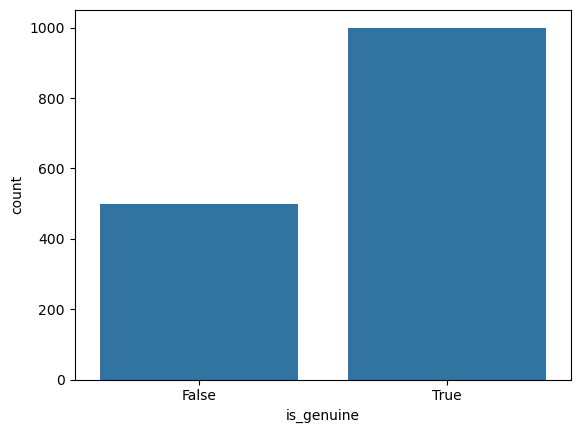

In [55]:
#Nombre de vrais et faux billets
sns.countplot(
    data=df,
    x="is_genuine") 
plt.show()

In [56]:
df.groupby("is_genuine").count()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,500,500,500,500,500,500
True,1000,1000,1000,1000,1000,1000


### 3.2 Répartition des dimensions des billets en fonction de leur authenticité

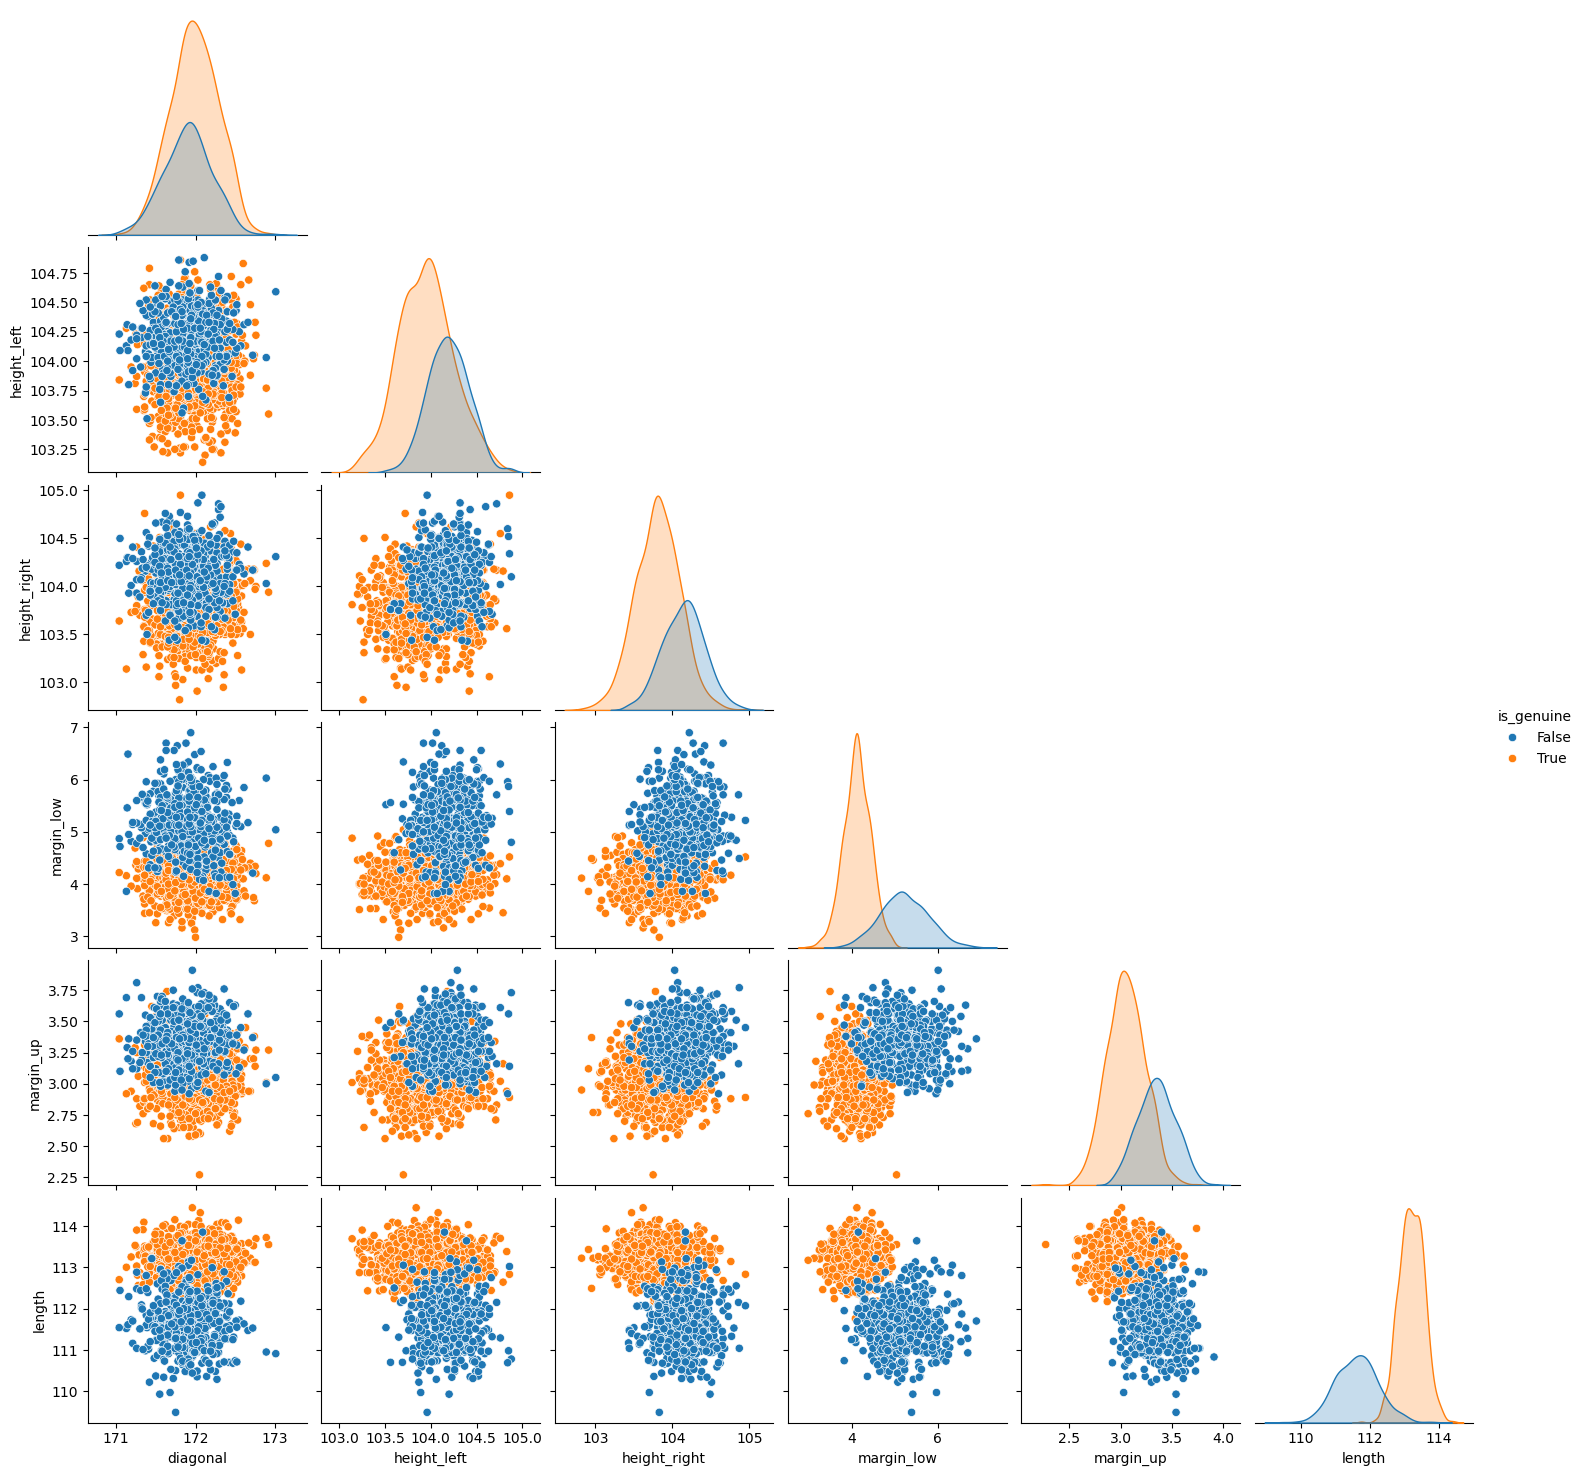

In [57]:
sns.pairplot(data=df, hue="is_genuine", corner= True)

Les vrais billets sont plus longs et ils ont des marges et des hauteurs plus petites que les faux billets.

### 3.3 Boxplot des variables

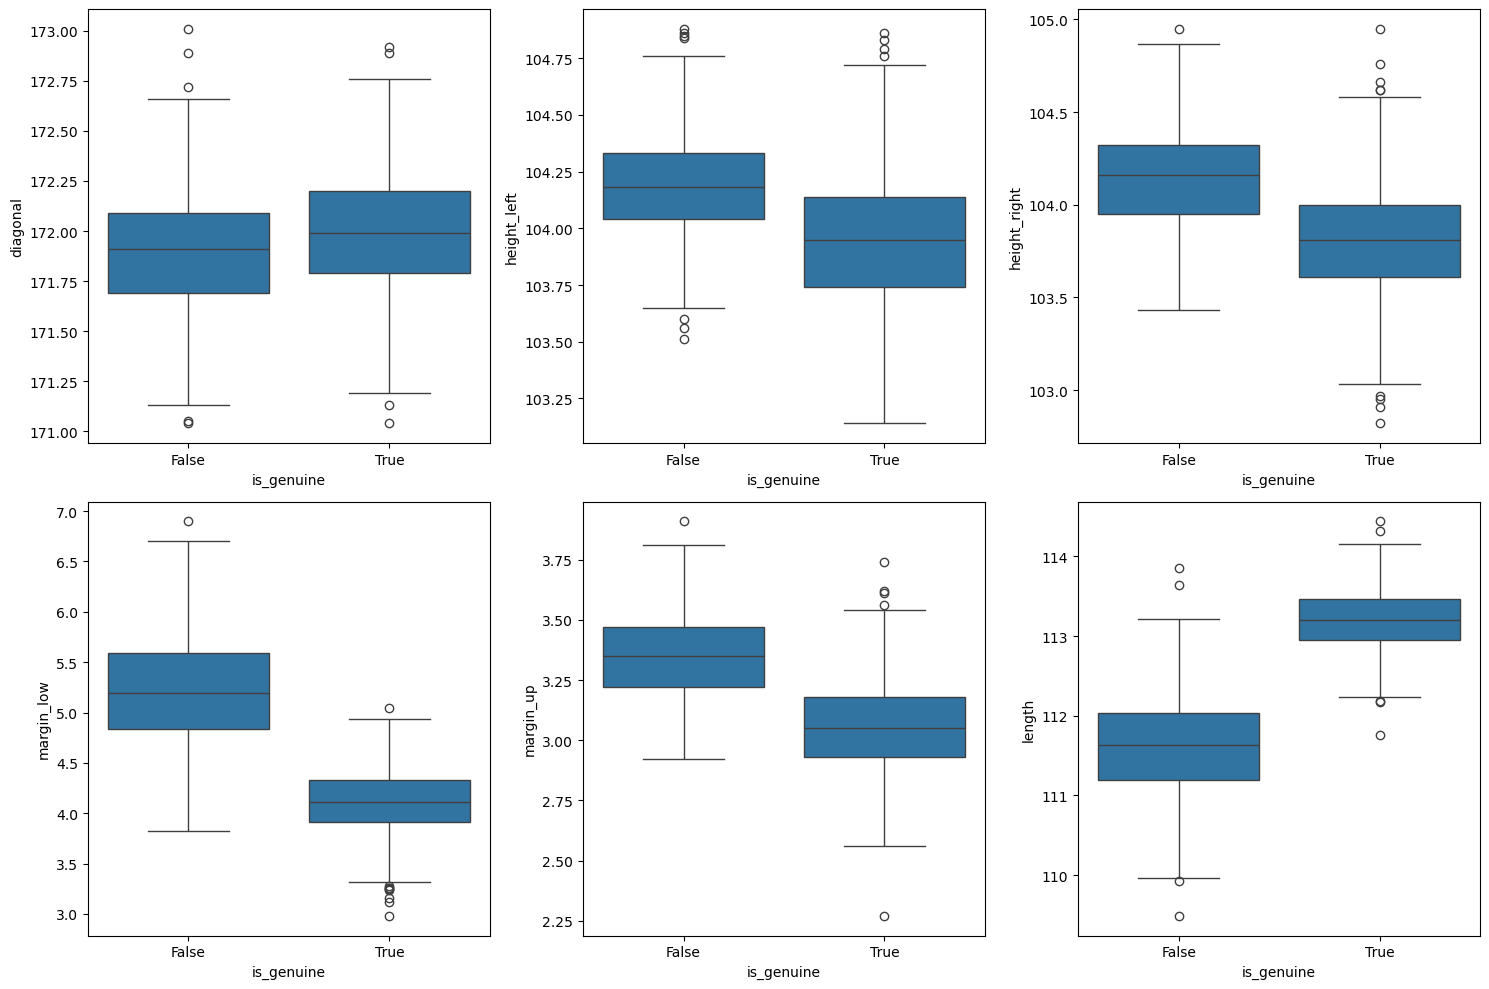

In [58]:
#Visualiser la distribution de chaque variable
fig, axes = plt.subplots(2,3, figsize=(15,10))

sns.boxplot(data=df,x="is_genuine",y=df["diagonal"], ax = axes[0,0])
sns.boxplot(data=df,x="is_genuine",y=df["height_left"], ax = axes[0,1])
sns.boxplot(data=df,x="is_genuine",y=df["height_right"], ax = axes[0,2])
sns.boxplot(data=df,x="is_genuine",y=df["margin_low"], ax = axes[1,0])
sns.boxplot(data=df,x="is_genuine",y=df["margin_up"], ax = axes[1,1])
sns.boxplot(data=df,x="is_genuine",y=df["length"], ax = axes[1,2])

plt.tight_layout()
plt.show()

Les faux billets sont plus petites en longueur et elles ont des marges et hauteurs au-dessus des vrais billets.
On observe beaucoup de vrais billets qui ont margin_low très bas par rapport à l'ensemble. Pareil pour les vrais billets qui ont height_left très élevés ou très bas. Cela doit être dû aux différentes valeur des billets. Les dimensions changent en fonction de la valeur du billet (plus un billet prend de la valeur et plus il est grand).

# Etape 4. Création du fichier final pour la mise en place des algorithmes

In [59]:
#Création du fichier csv du fichier préparé
df.to_csv("df.csv",index=False)